In [1]:
from platform import python_version
print('Versão usada:', python_version())

Versão usada: 3.9.12


In [2]:
#Importações

import joblib #joblib e pickle para salvar o modelo após o treinamento
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Carregando os dados:

dados = pd.read_csv('dataset.csv')
dados.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
dados.shape

(583, 11)

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

### Análise Exploratória de Dados

In [8]:
#Verificando as variáveis categóricas

dados.dtypes[dados.dtypes == 'object']

Gender    object
dtype: object

In [9]:
# Verificando as variáveis numéricas

dados.dtypes[dados.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

#### **Análise Exploratória das Variáveis Numéricas**

In [10]:
# Descrição dos dados

dados.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


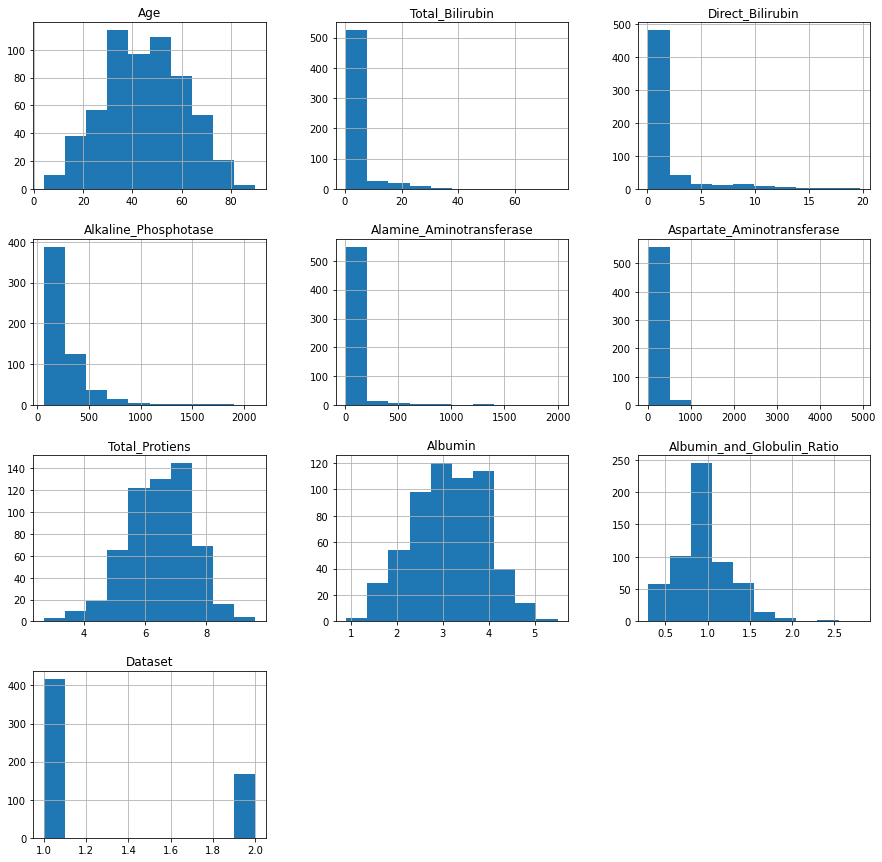

In [13]:
#Histograma

dados.hist(figsize=(15,15), bins= 10);

In [14]:
# A variável age segue uma distribuição normal

# Parece haver outliers nas variáveis Alamine_Aminotransferase, Aspartate_Aminotransferase, pois o valor máximo é muito mais alto que o valor médio.

# Uma outra maneira de verificar outliers sem plotar boxplot e observar o valor médio e o valor máximo.

In [15]:
# Mudando a variável target:

# 0 se não há doença
# 1 se há doença

def muda_var(x):
    
    if x == 2:
        return 0
    return 1

In [17]:
# Aplicando a função

dados['Dataset'] = dados['Dataset'].map(muda_var)
dados.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [18]:
#Trocando o nome da coluna Dataset

dados.rename({'Dataset':'Target'}, axis='columns', inplace=True)
dados.head()



,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [19]:
#Correlação das variáveis numéricas

dados.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131
Target,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.163131,1.000000


In [20]:
#Podemos observar uma alta correlação entre as variáiveis Total_Bilirubin e Direct_Bilirubin
# Isso pode indicar multicolinearidade.

In [24]:
correlacao = dados.corr()
type(correlacao)

pandas.core.frame.DataFrame

In [25]:
correlacao[correlacao >= 0.70]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Bilirubin,NaN,1.000000,0.874618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Direct_Bilirubin,NaN,0.874618,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alkaline_Phosphotase,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Alamine_Aminotransferase,NaN,NaN,NaN,NaN,1.000000,0.791966,NaN,NaN,NaN,NaN
Aspartate_Aminotransferase,NaN,NaN,NaN,NaN,0.791966,1.000000,NaN,NaN,NaN,NaN
Total_Protiens,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.784053,NaN,NaN
Albumin,NaN,NaN,NaN,NaN,NaN,NaN,0.784053,1.000000,NaN,NaN
Albumin_and_Globulin_Ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Target,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [26]:
# Observamos também alta correlação entre Alamine_Aminotransferase e Aspartate_Aminotransferase
# Também entre Total_Protiens e Albumin

# Vale salientar que ainda não fizemos nenhuma mudança no df, logo é melhor tomar qualquer decisão (retitrar ou não)
# variável após a limpeza do df

#### **Análise Exploratória das Variáveis Categóricas**

In [27]:
#Descrição dos dados
dados.describe(include='object')

,Gender
count,583
unique,2
top,Male
freq,441


Número de pacientes do sexo masculino: 441
Número de pacientes do sexo feminino: 142


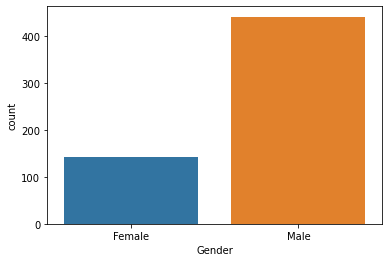

In [30]:
# Fazendo o countplot

sns.countplot(data=dados, x = 'Gender', label = 'Count')

M, F = dados['Gender'].value_counts()
print('Número de pacientes do sexo masculino:', M)
print('Número de pacientes do sexo feminino:', F)

In [31]:
# Observando o gráfico acima percebemos que há predominância de dados do sexo masculino.
# Dada as diferenças entre os organismos feminino e masculino o modelo poderá ser mais preciso quando o sexo
# for masculino.

# O que fazer?

# O ideal seria ir na fonte de dados e tentar obter mais dados do sexo feminino.
# Eliminar dados do sexo masculino não seria recomendado devido ao número pequeno de dados no df.

In [33]:
# Mudando a variável categórica para numérica usando label encoding

def label_encoding(x):
    if x == 'Male':
        return 0
    return 1

In [35]:
# Fazendo o mapeamento
dados['Gender'] = dados['Gender'].map(label_encoding)
dados.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [36]:
#Revendo as correlções

dados.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


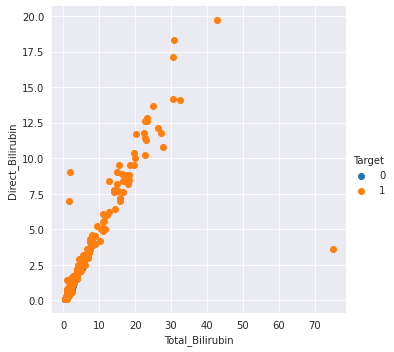

In [38]:
#Vendo as correlações graficamente

#Definindo a cor do background

sns.set_style('darkgrid')

#Facetgrid

sns.FacetGrid(dados, hue= 'Target', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend();


In [39]:
#Observa-se que essas duas variáveis tem uma alta correlação com pacientes com a doença (Target = 1)

#Resumindo, essas duas variáveis dizem a mesma coisa.

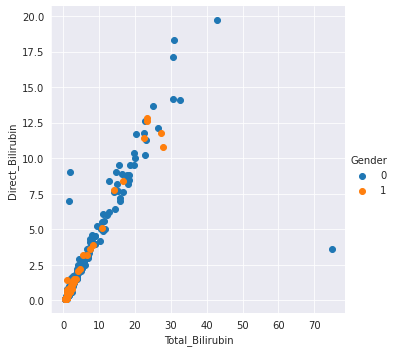

In [41]:
#Vendo por gênero:

sns.set_style('darkgrid')

sns.FacetGrid(dados, hue= 'Gender', size=5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend();

In [42]:
# Basicamente temos o mesmo comportamento do gráfico acima, logo o gênero não interfere.

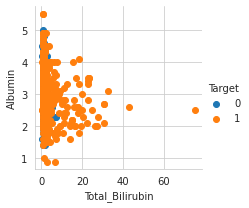

In [44]:
sns.set_style('whitegrid')

sns.FacetGrid(dados, hue= 'Target',).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend();

In [45]:
# Não há relação entre as variáveis

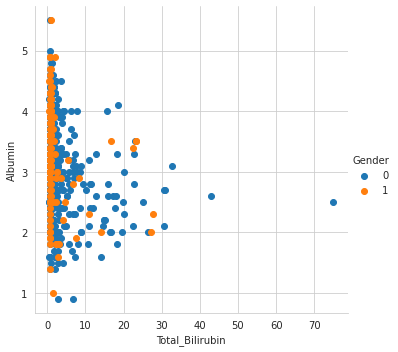

In [46]:
sns.set_style('whitegrid') 


sns.FacetGrid(dados, hue = 'Gender', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

In [48]:
# Verificando se há valores ausentes:

dados[dados.isnull().values] # temos 4 NaN

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [49]:
# Registros duplicados

dados[dados.duplicated(keep=False)]

#Temos bastante registros duplicados (complete case)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1


#### **Limpeza de Dados**

In [50]:
# Removendo os valores duplicados

dados = dados.drop_duplicates()

dados.shape

(570, 11)

#### **Tratamento de Outliers**

In [51]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,0.245614,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.712281
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


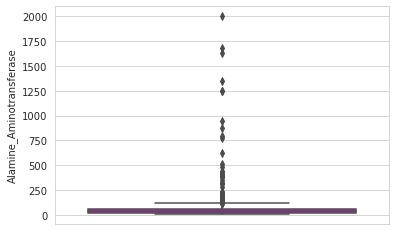

In [53]:
# A variável Alamine_Aminotransferase tem média 79 e valor máximo 2000, vamos verificar melhor com um boxplot.

sns.boxplot(y=dados['Alamine_Aminotransferase'], color= 'magenta', orient='v');

In [54]:
# Esses valores seriam mesmo outliers?

In [55]:
#Contagem de frequência de valores:

dados['Alamine_Aminotransferase'].sort_values(ascending=False).head()

117    2000
27     1680
47     1630
118    1350
135    1250
Name: Alamine_Aminotransferase, dtype: int64

In [56]:
#Observa-se que temos 117 pacientes com esse valor 2000, então talvez não seja um outliers. É provável que
#seja uma característica dos dados.

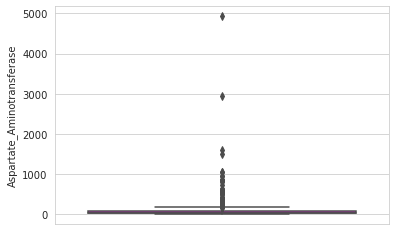

In [58]:
# Voltando para a tabela de describe temos a variável Aspartate_Aminotransferase
# com média de 109 e valor máximo de 4929

sns.boxplot(y=dados['Aspartate_Aminotransferase'], color='magenta', orient='v');

In [60]:
dados['Aspartate_Aminotransferase'].sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [62]:
#Temos mais pacientes e o valor máximo está muito acima da média.
# Neste caso vamos manter pacientes com valor Aspartate_Aminotransferase <= 3000

dados  = dados[dados['Aspartate_Aminotransferase'] <= 3000]
dados.shape

(569, 11)

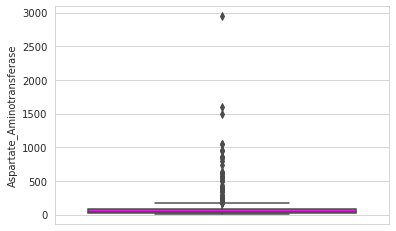

In [63]:
sns.boxplot(y = dados['Aspartate_Aminotransferase'], color= 'magenta', orient='v');

In [64]:
# Observamos que ainda temos outliers

dados['Aspartate_Aminotransferase'].sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [65]:
dados = dados[dados['Aspartate_Aminotransferase'] <=2500]

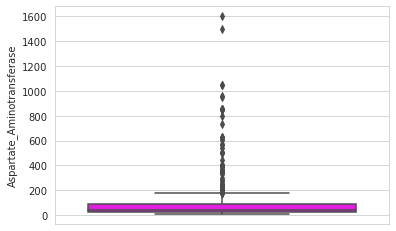

In [66]:
sns.boxplot(y = dados['Aspartate_Aminotransferase'], color= 'magenta', orient='v');

In [67]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,564.000000,568.000000
mean,44.834507,0.246479,3.291197,1.482042,290.482394,74.286972,95.901408,6.496831,3.150000,0.948174,0.711268
std,16.237569,0.431340,6.257583,2.826056,243.271522,155.240601,171.956479,1.089500,0.797571,0.319301,0.453573
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,1.000000


In [68]:
# Observamos que para a variável Alamine_Aminotransferase o valor máximo ficou em 1680, o que é bem mais razoável.

#### **Trantando Valores Ausentes**

In [69]:
dados.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [70]:
#Como são apenas 4 registros vamos simplismente deletar

dados = dados.dropna(how='any')
dados.shape

(564, 11)

In [71]:
dados.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

In [72]:
# Temos agora um df sem valores duplicados, outilers e valores ausentes

### Pré - Processamento de Dados

In [73]:
# Dada a alta correlação entre as variáveis Direct_Bilirubin e Total_Bilirubin, vamos remover Direct_Bilirubin
dados = dados.drop('Direct_Bilirubin', 1)

In [74]:
dados.shape

(564, 10)

#### **Divisão entre treino e teste**

In [75]:
# Como usaremos aprendizado supervisionado, vamos separar a variável target do restante do dataset

y = dados.Target

In [76]:
X = dados.drop('Target', axis=1)

In [77]:
# Fazendo a divisão entre treino e teste

X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                                                        y,
                                                        test_size=0.25,
                                                        random_state=1234,
                                                        stratify=dados.Target)

In [80]:
print(X_treino.shape)
print(X_teste.shape)

(423, 9)
(141, 9)


In [81]:
print(y_treino.shape)
print(y_teste.shape)

(423,)
(141,)


#### **Balanceamento de Classes**

In [82]:
y_treino.value_counts()

1    301
0    122
Name: Target, dtype: int64

In [83]:
# Temos classes desbalanceadas.
# Ao invés de remover registros da classe 1, vamos gerar novos registros para classe 0 (oversampling)

!pip install -q imblearn

In [84]:
#Carregando a funçao SMOTE

import imblearn
from imblearn.over_sampling import SMOTE

In [85]:
over_sampler = SMOTE(k_neighbors=2)
# k_neighbors=2 pega 2 registros mais próximos para detectar o padrão e gerar os dados sintéticos.

In [86]:
#!!! O BALANCEAMENTO DEVERÁ SER FEITO SOMENTE NOS DADOS DE TREINO !!!!

In [87]:
X_res, y_res = over_sampler.fit_resample(X_treino, y_treino)

In [88]:
y_res.value_counts()

1    301
0    301
Name: Target, dtype: int64

In [89]:
X_res.shape

(602, 9)

In [90]:
X_treino = X_res

In [91]:
y_treino = y_res

#### **Padronização dos Dados**

In [92]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,45,0,2.5,163,28,22,7.6,4.0,1.1
1,72,0,0.8,148,23,35,6.0,3.0,1.0
2,18,0,0.8,282,72,140,5.5,2.5,0.8
3,42,0,8.9,272,31,61,5.8,2.0,0.5
4,42,0,0.8,127,29,30,4.9,2.7,1.2


In [93]:
# Não se aplica padronização ou normalização na variável target, somente nas de entrada

In [94]:
# Calculamos média e desvio padrão dos dados de treino
treino_mean = X_treino.mean()
treino_std = X_treino.std()
print(treino_mean)
print(treino_std)

Age                            43.363787
Gender                          0.217608
Total_Bilirubin                 2.675007
Alkaline_Phosphotase          267.501661
Alamine_Aminotransferase       62.556478
Aspartate_Aminotransferase     77.883721
Total_Protiens                  6.521504
Albumin                         3.245639
Albumin_and_Globulin_Ratio      1.000083
dtype: float64
Age                            16.041820
Gender                          0.412963
Total_Bilirubin                 5.563288
Alkaline_Phosphotase          220.862251
Alamine_Aminotransferase      139.968303
Aspartate_Aminotransferase    144.221958
Total_Protiens                  1.026546
Albumin                         0.761954
Albumin_and_Globulin_Ratio      0.311904
dtype: float64


In [95]:
# Padronização
X_treino = (X_treino - treino_mean) / treino_std

In [96]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.101997,-0.526944,-0.031458,-0.473153,-0.246888,-0.387484,1.050607,0.990034,0.320347
1,1.785098,-0.526944,-0.337032,-0.541069,-0.282610,-0.297345,-0.508018,-0.322381,-0.000265
2,-1.581104,-0.526944,-0.337032,0.065644,0.067469,0.430699,-0.995088,-0.978588,-0.641488
3,-0.085015,-0.526944,1.118941,0.020367,-0.225454,-0.117068,-0.702846,-1.634795,-1.603324
4,-0.085015,-0.526944,-0.337032,-0.636151,-0.239743,-0.332014,-1.579573,-0.716105,0.640959


In [97]:
X_treino.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,6.020000e+02,6.020000e+02,602.000000,602.000000,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02
mean,-1.593410e-16,-5.901518e-17,0.000000,0.000000,-1.180304e-17,-1.180304e-17,-6.270363e-17,-6.963791e-16,1.888486e-16
std,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.453823e+00,-5.269437e-01,-0.408932,-0.925924,-3.754884e-01,-4.706892e-01,-3.722683e+00,-3.078451e+00,-2.244547e+00
25%,-7.083852e-01,-5.269437e-01,-0.342783,-0.441459,-2.897547e-01,-3.736166e-01,-6.054319e-01,-7.062132e-01,-6.414882e-01
50%,1.019967e-01,-5.269437e-01,-0.319057,-0.314683,-2.183100e-01,-2.973453e-01,7.646662e-02,-5.799313e-02,-2.646856e-04
75%,7.253674e-01,-5.269437e-01,-0.139307,0.059985,-7.542049e-02,-7.026476e-02,6.609511e-01,8.250620e-01,5.506944e-01
max,2.907165e+00,1.894584e+00,13.000404,8.342296,1.155578e+01,1.055398e+01,2.998889e+00,2.958656e+00,5.770747e+00


In [98]:
# Usamos média e desvio de treino para padronizar o conjunto de dados de teste
X_teste = (X_teste - treino_mean) / treino_std

In [99]:
X_teste.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
220,-0.396700,-0.526944,-0.337032,-0.545596,-0.254032,-0.221074,-1.482159,-0.978588,-0.000265
448,0.289008,1.894584,-0.337032,-0.568235,-0.261177,-0.366683,-0.508018,-0.847346,-0.962100
509,0.164334,-0.526944,3.114164,-0.061132,0.553293,3.204202,-1.092502,-0.322381,0.640959
415,1.660423,-0.526944,-0.247157,1.912950,0.217503,-0.262677,-2.845956,-0.716105,-0.962100
56,-0.646048,-0.526944,-0.337032,-0.314683,-0.261177,-0.380550,1.440264,0.990034,-0.000265


In [100]:
# Mesmo após treinado o modelo deverá receber dados padronizados da mesma forma que os dados de treino e teste.

###  Construção, Treinamento e Avaliação do Modelo 1 com Regressão Logística (Benchmark)

#### Para a primeira versão do modelo o ideal é escolher um algoritmo simples, fácil de compreender e que será usado como Benchmark.

In [101]:
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}

In [102]:
# Criaremos o modelo com GridSearch 
# Vários modelos serão criados com diferentes combinações de hiperparâmetros
# n_jobs = -1, não coloca limites, ele executa até achar o melhor modelo.
modelo_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1, 
                         scoring = 'roc_auc', 
                         n_jobs = -1)

In [103]:
#Treinando o modelo:
modelo_v1.fit(X_treino, y_treino)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [104]:
#Elege o melhor modelo:

modelo_v1.best_estimator_

LogisticRegression(C=0.1)

In [105]:
# Portanto neste caso o melhor modelo possui C =0.1

In [106]:
#Fazendo as previsões

y_pred_v1 = modelo_v1.predict(X_teste)

In [107]:
y_pred_v1[:10]

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1])

In [108]:
# Um ponto interessante é podemos ter ao invés da classe, a probabilidade de cada classe

y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)
y_pred_proba_v1

array([[7.07122502e-01, 2.92877498e-01],
       [4.99854512e-01, 5.00145488e-01],
       [5.07487467e-03, 9.94925125e-01],
       [3.59379867e-01, 6.40620133e-01],
       [6.45528203e-01, 3.54471797e-01],
       [5.66240396e-01, 4.33759604e-01],
       [6.76963927e-01, 3.23036073e-01],
       [1.41986160e-01, 8.58013840e-01],
       [5.86718514e-01, 4.13281486e-01],
       [3.93248893e-02, 9.60675111e-01],
       [6.53644876e-01, 3.46355124e-01],
       [1.14568870e-03, 9.98854311e-01],
       [1.76756191e-02, 9.82324381e-01],
       [5.44550291e-01, 4.55449709e-01],
       [6.50373035e-01, 3.49626965e-01],
       [6.25649294e-01, 3.74350706e-01],
       [5.46002665e-01, 4.53997335e-01],
       [3.72927521e-01, 6.27072479e-01],
       [5.40833501e-01, 4.59166499e-01],
       [6.46347265e-01, 3.53652735e-01],
       [8.69604535e-01, 1.30395465e-01],
       [6.34399742e-01, 3.65600258e-01],
       [1.05372020e-01, 8.94627980e-01],
       [6.82294782e-02, 9.31770522e-01],
       [5.437981

In [109]:
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
# Precisamos disso para calcula a Curva ROC
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:,1]
y_pred_proba_v1

array([0.2928775 , 0.50014549, 0.99492513, 0.64062013, 0.3544718 ,
       0.4337596 , 0.32303607, 0.85801384, 0.41328149, 0.96067511,
       0.34635512, 0.99885431, 0.98232438, 0.45544971, 0.34962696,
       0.37435071, 0.45399733, 0.62707248, 0.4591665 , 0.35365273,
       0.13039546, 0.36560026, 0.89462798, 0.93177052, 0.45620182,
       0.40179645, 0.99950955, 0.41192027, 0.72124729, 0.57654737,
       0.37349456, 0.63156706, 0.75532149, 0.33847768, 0.23762252,
       0.9623235 , 0.51282276, 0.46108965, 0.55235198, 0.46169699,
       0.40896702, 0.81160845, 0.35792606, 0.34406637, 0.38838602,
       0.90427036, 0.46411053, 0.44788363, 0.43705862, 0.61231503,
       0.3152735 , 0.96519613, 0.39935741, 0.57799037, 0.33159703,
       0.55789732, 0.61205268, 0.43579926, 0.99893429, 0.57105999,
       0.36267336, 0.60092215, 0.42629066, 0.29844701, 0.81373066,
       0.47448378, 0.67474323, 0.50006845, 0.26107912, 0.79520279,
       0.40587792, 0.55493317, 0.54521121, 0.62320307, 0.48437

In [110]:
#Matriz de confusão

confusion_matrix(y_teste, y_pred_v1)

array([[32,  8],
       [37, 64]])

In [111]:
# Extraindo cada valor da CM
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v1).ravel()

In [112]:
print(tn, fp, fn, tp)

32 8 37 64


In [113]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)
print(roc_auc_v1)

0.716831683168317


In [114]:
# Calcula a curva ROC com dados e previsões em teste
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)

In [115]:
# AUC em teste
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.7353960396039604


In [116]:
# Acurácia em teste
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

0.6808510638297872


### Feature Importance

In [117]:
# Construindo o modelo novamente com os melhores hiperparâmetros
# Isso é necessário pois a versão final não deve ter o GridSearchCV

modelo_v1 = LogisticRegression(C=1)
modelo_v1.fit(X_treino, y_treino)

LogisticRegression(C=1)

In [118]:
# Obtemos os coeficientes pelo maior usando np.argsort
indices = np.argsort(-abs(modelo_v1.coef_[0,:]))

In [119]:
print("Variáveis mais importantes para o resultado do modelo_v1:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v1:
--------------------------------------------------
Total_Bilirubin
Alamine_Aminotransferase
Aspartate_Aminotransferase
Albumin
Total_Protiens
Age
Alkaline_Phosphotase
Gender
Albumin_and_Globulin_Ratio


In [120]:
#Salvando em disco

with open('modelo_v1.pkl', 'wb') as pickle_file:
    joblib.dump(modelo_v1, 'modelo_v1.pkl')

In [121]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v1 = {'Nome': 'modelo_v1', 
                  'Algoritmo': 'Regressão Logística', 
                  'ROC_AUC Score': roc_auc_v1,
                  'AUC Score': auc_v1,
                  'Acurácia': acuracia_v1}

In [123]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

In [124]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v1, ignore_index = True)

In [125]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.716832,0.735396,0.680851


### **Construção, Treinamento e Avaliação do Modelo 2 com Random Forest**

In [126]:
# Grid de hiperparâmetros
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}

In [127]:
# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
modelo_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)

In [128]:
modelo_v2.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [130]:
#Melhor modelo
modelo_v2.best_estimator_

RandomForestClassifier()

In [131]:
# Previsões em teste
y_pred_v2 = modelo_v2.predict(X_teste)

In [132]:
# Obtém as previsões para a classe positiva
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste)[:,1]

In [133]:
confusion_matrix(y_teste, y_pred_v2)

array([[15, 25],
       [19, 82]])

In [134]:
# Curva ROC nos dados e previsões em teste
roc_auc_v2 = roc_auc_score(y_teste, y_pred_v2)
print(roc_auc_v2)

0.593440594059406


In [135]:
# Curva ROC nos dados e previsões em teste
fpr_v2, tpr_v2, thresholds = roc_curve(y_teste, y_pred_proba_v2)

In [136]:
# AUC em teste
auc_v2 = auc(fpr_v2, tpr_v2)
print(auc_v2)

0.7402227722772277


In [137]:
# Acurácia em teste
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)
print(acuracia_v2)

0.6879432624113475


#### Feature Importance

In [138]:
# Recria o modelo com os melhores hiperparâmetros
modelo_v2 = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 4)
modelo_v2.fit(X_treino, y_treino)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [139]:
# Variáveis mais relevantes
indices = np.argsort(-modelo_v2.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v2:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v2:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Aspartate_Aminotransferase
Albumin_and_Globulin_Ratio
Alamine_Aminotransferase
Age
Total_Protiens
Albumin
Gender


In [141]:
# Salva o modelo em disco
with open('modelo_v2.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v2, 'modelo_v2.pkl') 

In [142]:
# Dicionário com as métricas do modelo_v2
dict_modelo_v2 = {'Nome': 'modelo_v2', 
                  'Algoritmo': 'Random Forest', 
                  'ROC_AUC Score': roc_auc_v2,
                  'AUC Score': auc_v2,
                  'Acurácia': acuracia_v2}

In [143]:
df_modelos = df_modelos.append(dict_modelo_v2, ignore_index = True)

In [144]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.716832,0.735396,0.680851
1,modelo_v2,Random Forest,0.593441,0.740223,0.687943


### Construção, Treinamento e Avaliação do Modelo 3 com KNN

In [145]:
#Vamos primeiro elencar os possíveis valores k (numéros de vizinhos mais próximos)

vizinhos = list(range(1,20, 2))
vizinhos

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [146]:
#Lista para os scores

cv_scores = []

In [148]:
# Validação cruzada para determinar o melhor valor de k

for k in vizinhos:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn, X_treino, y_treino, cv = 5, scoring= 'accuracy')
    cv_scores.append(scores.mean())

In [149]:
# Ajustando o erro de classificação

erro = [1 - x for x in cv_scores]
erro

[0.24579889807162536,
 0.2689944903581267,
 0.32545454545454544,
 0.30387052341597787,
 0.3088567493112948,
 0.323801652892562,
 0.3221349862258953,
 0.32545454545454555,
 0.32549586776859507,
 0.32712121212121215]

In [150]:
# Determinando o melhor valor de k (com menor erro)

optimal_k = vizinhos[erro.index(min(erro))]
print('O valor ideal para k é %d' %optimal_k)

O valor ideal para k é 1


In [151]:
# Agora podemos criar o modelo 3

modelo_v3 = KNeighborsClassifier(n_neighbors= optimal_k)

In [152]:
# Treinando o modelo 3

modelo_v3.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=1)

In [153]:
# Previsões

y_pred_v3 = modelo_v3.predict(X_teste)

In [154]:
# Matriz de confusão

confusion_matrix(y_teste, y_pred_v3)

array([[15, 25],
       [39, 62]])

In [155]:
# Previsão de probabilidade da classe positiva
y_pred_proba_v3 = modelo_v3.predict_proba(X_teste)[:,1]

In [156]:
# Calcula ROC_AUC em teste
roc_auc_v3 = roc_auc_score(y_teste, y_pred_v3)
print(roc_auc_v3)

0.4944306930693069


In [157]:
# Calcula curva ROC
fpr_v3, tpr_v3, thresholds = roc_curve(y_teste, y_pred_proba_v3)

In [158]:
# Calcula AUC em teste
auc_v3 = auc(fpr_v3, tpr_v3)
print(auc_v3)

0.4944306930693069


In [159]:
# Calcula acurácia
acuracia_v3 = accuracy_score(y_teste, y_pred_v3)
print(acuracia_v3)

0.5460992907801419


In [160]:
# Por uma característica do modelo KNN, o mesmo não possui variáveis mais importantes

In [161]:
# Salva o modelo em disco
with open('modelo_v3.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v3, 'modelo_v3.pkl') 

In [162]:
# Dicionário com as métricas do modelo_v3
dict_modelo_v3 = {'Nome': 'modelo_v3', 
                  'Algoritmo': 'KNN', 
                  'ROC_AUC Score': roc_auc_v3,
                  'AUC Score': auc_v3,
                  'Acurácia': acuracia_v3}

In [163]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v3, ignore_index = True)

In [164]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.716832,0.735396,0.680851
1,modelo_v2,Random Forest,0.593441,0.740223,0.687943
2,modelo_v3,KNN,0.494431,0.494431,0.546099


### Construção, Treinamento e Avaliação do Modelo 4 com Decision Tree

In [165]:
# Hiperparâmetros
tuned_params_v4 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}

In [166]:
# Cria o modelo com RandomizedSearchCV
modelo_v4 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)

In [167]:
# Treinamento
modelo_v4.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [168]:
# Melhor modelo
modelo_v4.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3)

In [169]:
# Previsões de classe
y_pred_v4 = modelo_v4.predict(X_teste)

In [171]:
 #Previsões de probabilidade
y_pred_proba_v4 = modelo_v4.predict_proba(X_teste)[:,1]

In [172]:
# Confusion matrix
confusion_matrix(y_teste, y_pred_v4)

array([[23, 17],
       [39, 62]])

In [173]:
# Calcula ROC AUC score
roc_auc_v4 = roc_auc_score(y_teste, y_pred_v4)
print(roc_auc_v4)

0.5944306930693068


In [174]:
# Curva ROC
fpr_v4, tpr_v4, thresholds = roc_curve(y_teste, y_pred_proba_v4)

In [175]:
# AUC
auc_v4 = auc(fpr_v4, tpr_v4)
print(auc_v4)

0.6301980198019803


In [176]:
# Calcula acurácia
acuracia_v4 = accuracy_score(y_teste, y_pred_v4)
print(acuracia_v4)

0.6028368794326241


### Feature Importance


In [178]:
 #Recriando o modelo
modelo_v4 = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 6, max_depth = 4)
modelo_v4.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [179]:
# Variáveis mais importantes
indices = np.argsort(-modelo_v4.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v4:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v4:
--------------------------------------------------
Total_Bilirubin
Aspartate_Aminotransferase
Age
Alkaline_Phosphotase
Alamine_Aminotransferase
Albumin_and_Globulin_Ratio
Gender
Total_Protiens
Albumin


In [180]:
# Salva o modelo em disco
with open('modelo_v4.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v4, 'modelo_v4.pkl') 

In [181]:
# Dicionário com as métricas do modelo_v4
dict_modelo_v4 = {'Nome': 'modelo_v4', 
                  'Algoritmo': 'Decision Tree', 
                  'ROC_AUC Score': roc_auc_v4,
                  'AUC Score': auc_v4,
                  'Acurácia': acuracia_v4}

In [182]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v4, ignore_index = True)

In [183]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.716832,0.735396,0.680851
1,modelo_v2,Random Forest,0.593441,0.740223,0.687943
2,modelo_v3,KNN,0.494431,0.494431,0.546099
3,modelo_v4,Decision Tree,0.594431,0.630198,0.602837


### Construção, Treinamento e Avaliação do Modelo 5 com SVM


In [184]:
# Função para seleção de hiperparâmetros
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
    grid_search.fit(X_treino, y_treino)
    grid_search.best_params_
    return grid_search.best_params_

In [185]:
# Aplica a função
svc_param_selection(X_treino, y_treino, 5)

{'C': 10, 'gamma': 1}

In [186]:
# Cria o modelo com os melhores hiperparâmetros
modelo_v5 = SVC(C = 1, gamma = 1, probability = True)

In [188]:
 #Treinamento
modelo_v5.fit(X_treino, y_treino)

SVC(C=1, gamma=1, probability=True)

In [189]:
# Previsões de classe
y_pred_v5 = modelo_v5.predict(X_teste)

In [190]:
confusion_matrix(y_teste, y_pred_v5)

array([[16, 24],
       [29, 72]])

In [191]:
# Previsões de probabilidade
y_pred_proba_v5 = modelo_v5.predict_proba(X_teste)[:, 1]

In [192]:
# Calcula ROC AUC score
roc_auc_v5 = roc_auc_score(y_teste, y_pred_v5)
print(roc_auc_v5)

0.5564356435643565


In [193]:
# Calcula curva ROC
fpr_v5, tpr_v5, thresholds = roc_curve(y_teste, y_pred_proba_v5)

In [194]:
# Calcula AUC score
auc_v5 = auc(fpr_v5, tpr_v5)
print(auc_v5)

0.6245049504950495


In [195]:
# Calcula acurácia
acuracia_v5 = accuracy_score(y_teste, y_pred_v5)
print(acuracia_v5)

0.624113475177305


In [196]:
# Salva o modelo em disco
with open('modelo_v5.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v5, 'modelo_v5.pkl') 

In [197]:
# Dicionário com as métricas do modelo_v5
dict_modelo_v5 = {'Nome': 'modelo_v5', 
                  'Algoritmo': 'SVM', 
                  'ROC_AUC Score': roc_auc_v5,
                  'AUC Score': auc_v5,
                  'Acurácia': acuracia_v5}

In [198]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v5, ignore_index = True)

In [199]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.716832,0.735396,0.680851
1,modelo_v2,Random Forest,0.593441,0.740223,0.687943
2,modelo_v3,KNN,0.494431,0.494431,0.546099
3,modelo_v4,Decision Tree,0.594431,0.630198,0.602837
4,modelo_v5,SVM,0.556436,0.624505,0.624113


### **Selecção do Melhor Modelo**

In [200]:
# Usaremos o modelo que teve o maior AUC Score, por se tratar de uma métrica global
# O score AUC é o ideal para comparar modelos de diferentes algoritmos
df_melhor_modelo = df_modelos[df_modelos['AUC Score'] == df_modelos['AUC Score'].max()]

In [201]:
df_melhor_modelo.head()

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
1,modelo_v2,Random Forest,0.593441,0.740223,0.687943


### Fazendo previsões com o melhor modelo

In [205]:
# Obtemos o nome do melhor modelo
modelo = df_melhor_modelo.Nome.to_string(index = False)
modelo

'modelo_v2'

In [206]:
# Carregamos o melhor modelo do disco
melhor_modelo = joblib.load(modelo + '.pkl')
melhor_modelo

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [207]:
# Dados brutos de um novo paciente
# O número de colunas deve ser o mesmo do que foi usado em treino
novo_paciente = [72, 1, 0.8, 186, 15, 29, 7.1, 3.4, 0.97]

In [208]:
# Converte o objeto para array
arr_paciente = np.array(novo_paciente)

In [209]:
# Usamos média e desvio de treino para padronizar novos dados
arr_paciente = (arr_paciente - treino_mean) / treino_std

In [210]:
# Converte o objeto para array
arr_paciente = np.array(arr_paciente)
arr_paciente

array([ 1.78509751,  1.8945837 , -0.33703225, -0.3690158 , -0.33976606,
       -0.33894784,  0.56353702,  0.2025852 , -0.09644822])

In [211]:
# Previsões de classe
pred_novo_paciente = melhor_modelo.predict(arr_paciente.reshape(1, -1))

In [212]:
# Verifica o valor e imprime o resultado final
if pred_novo_paciente == 1:
    print('Este paciente deve apresentar doença hepática!')
else:
    print('Este paciente não deve apresentar doença hepática!')

Este paciente deve apresentar doença hepática!


### Fim do Projeto